<a href="https://colab.research.google.com/github/klu80082/2420080082-ML/blob/main/2420080082week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# =====================================
# IMPORT LIBRARIES
# =====================================
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

plt.rcParams["figure.figsize"] = (6, 5)

In [2]:
print("Generating datasets...")

# Moons
X_moons, y_moons = make_moons(n_samples=300, noise=0.25, random_state=42)

# Circles
X_circles, y_circles = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)

# XOR dataset
np.random.seed(42)
X_xor = np.random.randn(300, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0).astype(int)

Generating datasets...


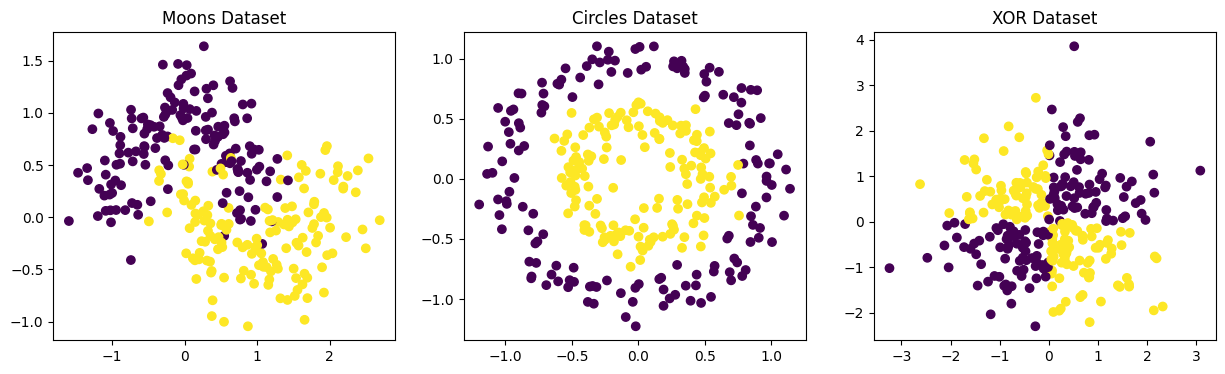

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons)
axes[0].set_title("Moons Dataset")

axes[1].scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles)
axes[1].set_title("Circles Dataset")

axes[2].scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor)
axes[2].set_title("XOR Dataset")

plt.show()

In [4]:
def plot_svm(model, X, y, title):
    plt.figure(figsize=(5,4))

    # mesh
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.25)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

    # support vectors
    plt.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=120,
        facecolors='none',
        edgecolors='red',
        label="Support Vectors"
    )

    plt.title(title)
    plt.legend()
    plt.show()

In [5]:
# Using moons dataset for kernel comparison
X_train, X_test, y_train, y_test = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=42
)

results = []

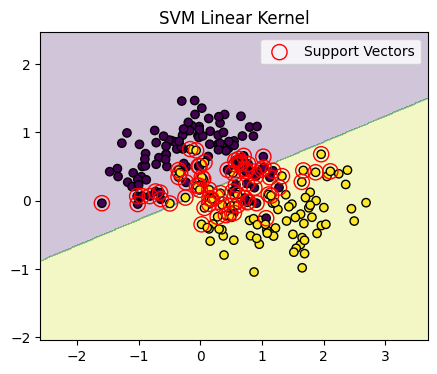

In [6]:
svm_linear = SVC(kernel="linear", C=1)
svm_linear.fit(X_train, y_train)

pred = svm_linear.predict(X_test)
acc = accuracy_score(y_test, pred)
results.append(["Linear", acc])

plot_svm(svm_linear, X_train, y_train, "SVM Linear Kernel")

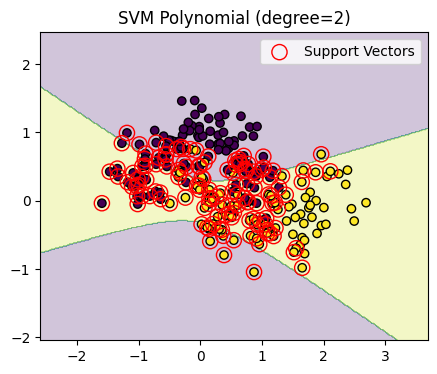

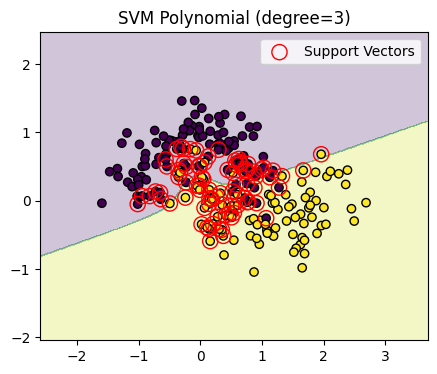

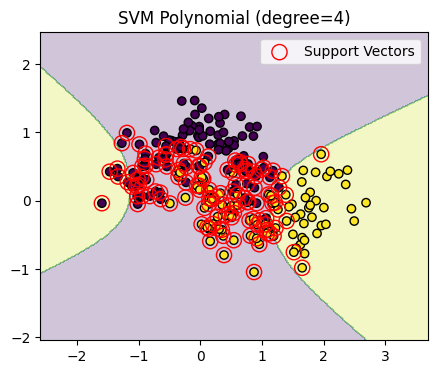

In [7]:
for deg in [2, 3, 4]:
    svm_poly = SVC(kernel="poly", degree=deg, C=1)
    svm_poly.fit(X_train, y_train)

    pred = svm_poly.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results.append([f"Poly d={deg}", acc])

    plot_svm(svm_poly, X_train, y_train, f"SVM Polynomial (degree={deg})")

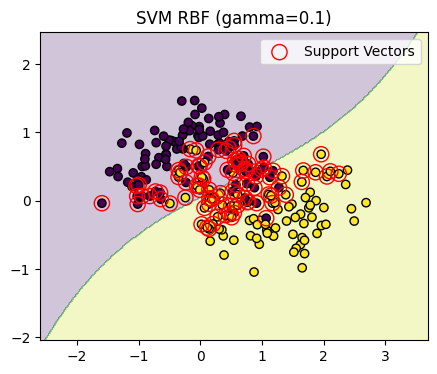

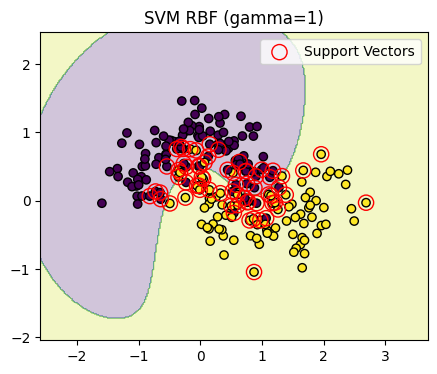

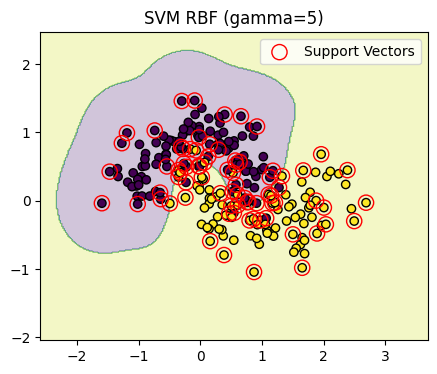

In [8]:
for gamma in [0.1, 1, 5]:
    svm_rbf = SVC(kernel="rbf", gamma=gamma, C=1)
    svm_rbf.fit(X_train, y_train)

    pred = svm_rbf.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results.append([f"RBF γ={gamma}", acc])

    plot_svm(svm_rbf, X_train, y_train, f"SVM RBF (gamma={gamma})")

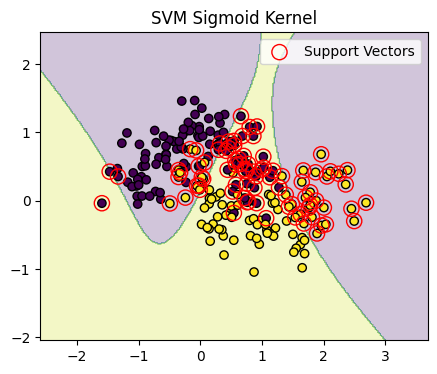

In [9]:
svm_sig = SVC(kernel="sigmoid", C=1)
svm_sig.fit(X_train, y_train)

pred = svm_sig.predict(X_test)
acc = accuracy_score(y_test, pred)
results.append(["Sigmoid", acc])

plot_svm(svm_sig, X_train, y_train, "SVM Sigmoid Kernel")

      Kernel  Accuracy
0     Linear  0.888889
1   Poly d=2  0.800000
2   Poly d=3  0.888889
3   Poly d=4  0.655556
4  RBF γ=0.1  0.877778
5    RBF γ=1  0.911111
6    RBF γ=5  0.955556
7    Sigmoid  0.644444


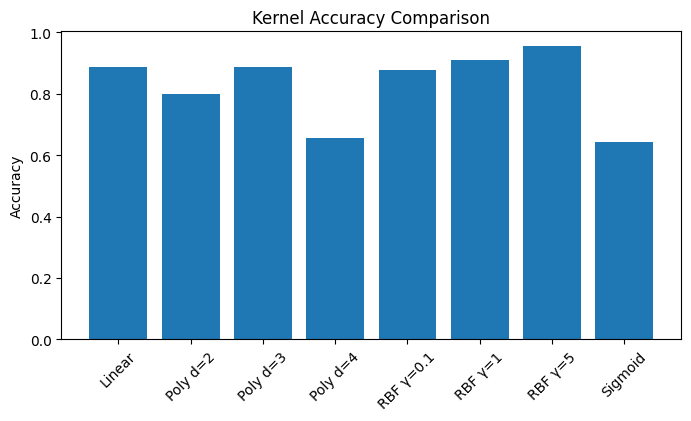

In [10]:
df_results = pd.DataFrame(results, columns=["Kernel", "Accuracy"])
print(df_results)

plt.figure(figsize=(8,4))
plt.bar(df_results["Kernel"], df_results["Accuracy"])
plt.xticks(rotation=45)
plt.title("Kernel Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

In [11]:
print("\nEffect of C and Gamma (RBF kernel)")

for C in [0.1, 1, 10]:
    for gamma in [0.1, 1]:
        model = SVC(kernel="rbf", C=C, gamma=gamma)
        model.fit(X_train, y_train)
        acc = accuracy_score(y_test, model.predict(X_test))
        print(f"C={C}, gamma={gamma} → Accuracy={acc:.3f}")


Effect of C and Gamma (RBF kernel)
C=0.1, gamma=0.1 → Accuracy=0.889
C=0.1, gamma=1 → Accuracy=0.911
C=1, gamma=0.1 → Accuracy=0.878
C=1, gamma=1 → Accuracy=0.911
C=10, gamma=0.1 → Accuracy=0.889
C=10, gamma=1 → Accuracy=0.933
